In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
import pandas as pd

In [4]:
path="/content/gdrive/MyDrive/titanic_data/"
train=pd.read_csv(path+"train.csv")
test=pd.read_csv(path+"test.csv")

In [5]:
train
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


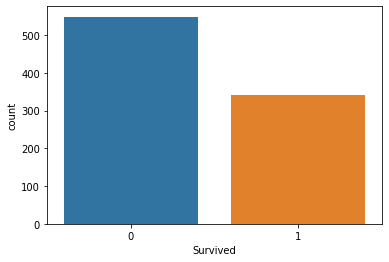

In [8]:
sns.countplot(train['Survived'])

In [9]:
train['Pclass']
train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


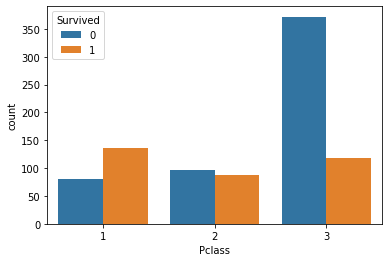

In [10]:
sns.countplot(train['Pclass'], hue=train['Survived'])

In [11]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [12]:
# Mr. xxx
# Miss. xxx
# ...
# 호칭별 인원수 출력

train['Name_Title']=train['Name'].apply(lambda x:x.split(",")[1]).apply(lambda x:x.split()[0])

In [13]:
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
the            1
Don.           1
Ms.            1
Sir.           1
Lady.          1
Jonkheer.      1
Capt.          1
Mme.           1
Name: Name_Title, dtype: int64

In [14]:
train['Survived'].groupby(train['Name_Title']).mean()

Name_Title
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64

In [15]:
train['Name']
train['Name_Len'] = train['Name'].apply(lambda x: len(x))

In [16]:
train['Name_Len']
#이름의 길이를 구간으로 나눈 다음, 구간별 생존율?
train['Survived'].groupby(pd.qcut(train['Name_Len'],5)).mean()

Name_Len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64

In [17]:
train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [18]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [19]:
train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Name_Title   891 non-null    object 
 13  Name_Len     891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [21]:
train['Survived'].groupby(pd.qcut(train['Age'],5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

In [22]:
pd.qcut(train['Age'],5).value_counts(normalize=True)

(0.419, 19.0]    0.229692
(31.8, 41.0]     0.201681
(41.0, 80.0]     0.198880
(19.0, 25.0]     0.191877
(25.0, 31.8]     0.177871
Name: Age, dtype: float64

In [23]:
train['Survived'].groupby(train['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [24]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [25]:
train['Survived'].groupby(train['Parch']).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [26]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [27]:
train['Ticket'].head(n=10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [28]:
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))

In [29]:
train.groupby(['Ticket_Len'])['Survived'].mean()

Ticket_Len
3     0.000000
4     0.366337
5     0.618321
6     0.319809
7     0.296296
8     0.539474
9     0.192308
10    0.341463
11    0.250000
12    0.400000
13    0.400000
15    0.333333
16    0.272727
17    0.428571
18    0.000000
Name: Survived, dtype: float64

In [30]:
train['Ticket_Len'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: Ticket_Len, dtype: int64

In [31]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [32]:
train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])

In [33]:
train['Ticket_Lett'].value_counts()

3    301
2    183
1    146
S     65
P     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_Lett, dtype: int64

In [34]:
train.groupby(['Ticket_Lett'])['Survived'].mean()

Ticket_Lett
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

In [35]:
pd.qcut(train['Fare'], 3).value_counts()

(-0.001, 8.662]    308
(26.0, 512.329]    295
(8.662, 26.0]      288
Name: Fare, dtype: int64

In [36]:
train['Survived'].groupby(pd.qcut(train['Fare'], 3)).mean()

Fare
(-0.001, 8.662]    0.198052
(8.662, 26.0]      0.402778
(26.0, 512.329]    0.559322
Name: Survived, dtype: float64

In [37]:
pd.crosstab(pd.qcut(train['Fare'], 5), columns=train['Pclass'])

Pclass,1,2,3
Fare,,,
"(-0.001, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Name_Title   891 non-null    object 
 13  Name_Len     891 non-null    int64  
 14  Ticket_Len   891 non-null    int64  
 15  Ticket_Lett  891 non-null    object 
dtypes: float64(2), int64(7), object(7)
memory usage: 111.5+ KB


In [39]:
train['Cabin_Letter'] = train['Cabin'].apply(lambda x: str(x)[0])

In [40]:
train['Cabin_Letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

In [41]:
train['Survived'].groupby(train['Cabin_Letter']).mean()

Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

In [42]:
train['Cabin_num']=train['Cabin'].apply(lambda x: str(x).split()[-1][1:])
train['Cabin_num'].replace("an", np.NaN, inplace=True)
#C 20 => [C, 20] => [-1] => 20
#C85 -> 85

In [43]:
train['Cabin_num']

0      NaN
1       85
2      NaN
3      123
4      NaN
      ... 
886    NaN
887     42
888    NaN
889    148
890    NaN
Name: Cabin_num, Length: 891, dtype: object

In [44]:
train['Cabin_num']=train['Cabin_num'].apply(lambda x:int(x) if not pd.isnull(x) and x !="" else np.NaN)

In [45]:
pd.qcut(train['Cabin_num'],3).value_counts()

(65.667, 148.0]     67
(1.999, 28.667]     67
(28.667, 65.667]    66
Name: Cabin_num, dtype: int64

In [46]:
train['Survived'].groupby(pd.qcut(train['Cabin_num'], 3)).mean()

Cabin_num
(1.999, 28.667]     0.716418
(28.667, 65.667]    0.651515
(65.667, 148.0]     0.641791
Name: Survived, dtype: float64

In [47]:
train['Survived'].corr(train['Cabin_num'])

-0.06384595922789371

In [48]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [49]:
train['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [50]:
train['Survived'].groupby(train['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


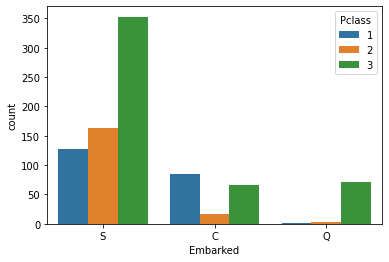

In [51]:
sns.countplot(train['Embarked'], hue=train['Pclass'])

In [52]:
#feature engineering

In [53]:
def names(train, test):
    for i in [train, test]:
        i['Name_Len']=i['Name'].apply(lambda x:len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test

In [54]:
train=pd.read_csv(path+"train.csv")

In [55]:
test=pd.read_csv(path+"test.csv")

In [56]:
train, test=names(train, test)

In [57]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Len,Name_Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,Mr.
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,51,Mrs.
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,Miss.
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,44,Mrs.
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,24,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,21,Rev.
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,28,Miss.
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,40,Miss.
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,21,Mr.


In [58]:
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
    train['mean'] = train.groupby(['Name_Title', 'Pclass'])['Age'].transform('mean')
    train['Age'] = train['Age'].fillna(train['mean'])
    z = test.merge(train, on=['Name_Title', 'Pclass'], how='left').drop_duplicates(['PassengerId_x'])
    test['Age'] = np.where(test['Age'].isnull(), z['mean'], test['Age'])
    test['Age'] = test['Age'].fillna(test['Age'].mean())
    del train['mean']
    return train,test

In [59]:
train,test=age_impute(train, test)

In [60]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Sex            891 non-null    object 
 4   Age            891 non-null    float64
 5   SibSp          891 non-null    int64  
 6   Parch          891 non-null    int64  
 7   Ticket         891 non-null    object 
 8   Fare           891 non-null    float64
 9   Cabin          204 non-null    object 
 10  Embarked       889 non-null    object 
 11  Name_Len       891 non-null    int64  
 12  Name_Title     891 non-null    object 
 13  Age_Null_Flag  891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column         Non

In [61]:
def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test

In [62]:
train, test = fam_size(train, test)


In [63]:
def ticket_grouped(train, test):
    for i in [train, test]:
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test

In [64]:
train, test = ticket_grouped(train, test)


In [65]:
def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3)
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test

In [66]:
train, test = cabin_num(train, test)

In [79]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Name_Len,Name_Title,Age_Null_Flag,Fam_Size,Ticket_Len,"Cabin_num_(1.999, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148.0]",Cabin_Letter
0,1,0,3,male,22.0,7.2500,S,23,Mr.,0,Nuclear,9,0,0,0,n
1,2,1,1,female,38.0,71.2833,C,51,Mrs.,0,Nuclear,8,0,0,1,C
2,3,1,3,female,26.0,7.9250,S,22,Miss.,0,Solo,16,0,0,0,n
3,4,1,1,female,35.0,53.1000,S,44,Mrs.,0,Nuclear,6,0,0,1,C
4,5,0,3,male,35.0,8.0500,S,24,Mr.,0,Solo,6,0,0,0,n


In [81]:
def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

In [82]:
train, test = embarked_impute(train, test)


In [83]:
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

In [84]:
train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 
                                              'Cabin_Letter', 'Name_Title', 'Fam_Size'])

In [85]:
train.head()

,PassengerId,Survived,Age,Fare,Name_Len,Age_Null_Flag,Ticket_Len,"Cabin_num_(1.999, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148.0]",Pclass_3,Pclass_1,Pclass_2,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q,Cabin_Letter_n,Cabin_Letter_C,Cabin_Letter_E,Cabin_Letter_G,Cabin_Letter_D,Cabin_Letter_A,Cabin_Letter_B,Cabin_Letter_F,Name_Title_Mr.,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big
0,1,0,22.0,7.2500,23,0,9,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,2,1,38.0,71.2833,51,0,8,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,1,26.0,7.9250,22,0,16,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,4,1,35.0,53.1000,44,0,6,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,5,0,35.0,8.0500,24,0,6,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [86]:
def drop(train, test, bye = ['PassengerId']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test

In [87]:
train, test = drop(train, test)

In [88]:
train

,Survived,Age,Fare,Name_Len,Age_Null_Flag,Ticket_Len,"Cabin_num_(1.999, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148.0]",Pclass_3,Pclass_1,Pclass_2,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q,Cabin_Letter_n,Cabin_Letter_C,Cabin_Letter_E,Cabin_Letter_G,Cabin_Letter_D,Cabin_Letter_A,Cabin_Letter_B,Cabin_Letter_F,Name_Title_Mr.,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big
0,0,22.000000,7.2500,23,0,9,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1,38.000000,71.2833,51,0,8,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,22,0,16,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,1,35.000000,53.1000,44,0,6,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,35.000000,8.0500,24,0,6,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,21,0,6,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
887,1,19.000000,30.0000,28,0,6,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
888,0,16.123188,23.4500,40,1,10,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
889,1,26.000000,30.0000,21,0,6,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
b

In [67]:
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test

In [68]:
train, test = cabin(train, test)

In [69]:
music_df = pd.DataFrame({'music_id': [1, 2, 3, 4, 5], 
                      'music_genre': ['rock', 
                                      'disco',
                                      'pop', 
                                      'rock',
                                      'pop']}
                      , columns = ['music_id', 'music_genre'])


In [70]:
music_df

,music_id,music_genre
0,1,rock
1,2,disco
2,3,pop
3,4,rock
4,5,pop


In [71]:
music_dummy_mat = pd.get_dummies(music_df['music_genre'])
music_dummy_mat

,disco,pop,rock
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [72]:
music_dummy_mat = music_df.join(music_dummy_mat.add_prefix('genre_'))

In [73]:
music_dummy_mat

,music_id,music_genre,genre_disco,genre_pop,genre_rock
0,1,rock,0,0,1
1,2,disco,1,0,0
2,3,pop,0,1,0
3,4,rock,0,0,1
4,5,pop,0,1,0


In [74]:
# 그룹별 연산
# transform 함수 :  스칼라값 or 같은 크기를 갖는 배열이 리턴
# apply 함수 : 스칼라값이 리턴

In [75]:
tips=sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [76]:
tips.groupby("day").apply(np.mean)

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


In [77]:
tips.groupby("day").transform(np.mean)

,total_bill,tip,size
0,21.410000,3.255132,2.842105
1,21.410000,3.255132,2.842105
2,21.410000,3.255132,2.842105
3,21.410000,3.255132,2.842105
4,21.410000,3.255132,2.842105
...,...,...,...
239,20.441379,2.993103,2.517241
240,20.441379,2.993103,2.517241
241,20.441379,2.993103,2.517241
242,20.441379,2.993103,2.517241


In [78]:
z=test.merge(train, on=['Name_Title', 'Pclass'], how="left").drop_duplicates(['PassengerId_x'])
z


,PassengerId_x,Pclass,Sex_x,Age_x,Fare_x,Embarked_x,Name_Len_x,Name_Title,Age_Null_Flag_x,Fam_Size_x,Ticket_Len_x,"Cabin_num_(1.999, 28.667]_x","Cabin_num_(28.667, 65.667]_x","Cabin_num_(65.667, 148.0]_x",Cabin_Letter_x,PassengerId_y,Survived,Sex_y,Age_y,Fare_y,Embarked_y,Name_Len_y,Age_Null_Flag_y,Fam_Size_y,Ticket_Len_y,"Cabin_num_(1.999, 28.667]_y","Cabin_num_(28.667, 65.667]_y","Cabin_num_(65.667, 148.0]_y",Cabin_Letter_y
0,892,3,male,34.500000,7.8292,Q,16,Mr.,0,Solo,6,0,0,0,n,1.0,0.0,male,22.000000,7.2500,S,23.0,0.0,Nuclear,9.0,0.0,0.0,0.0,n
319,893,3,female,47.000000,7.0000,S,32,Mrs.,0,Nuclear,6,0,0,1,n,9.0,1.0,female,27.000000,11.1333,S,49.0,0.0,Nuclear,6.0,0.0,0.0,0.0,n
361,894,2,male,62.000000,9.6875,Q,25,Mr.,0,Solo,6,0,0,0,n,18.0,1.0,male,32.768293,13.0000,S,28.0,1.0,Solo,6.0,0.0,0.0,0.0,n
452,895,3,male,27.000000,8.6625,S,16,Mr.,0,Solo,6,0,0,1,n,1.0,0.0,male,22.000000,7.2500,S,23.0,0.0,Nuclear,9.0,0.0,0.0,0.0,n
771,896,3,female,22.000000,12.2875,S,44,Mrs.,0,Nuclear,7,0,0,0,n,9.0,1.0,female,27.000000,11.1333,S,49.0,0.0,Nuclear,6.0,0.0,0.0,0.0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60715,1305,3,male,28.724891,8.0500,S,18,Mr.,1,Solo,9,0,0,0,n,1.0,0.0,male,22.000000,7.2500,S,23.0,0.0,Nuclear,9.0,0.0,0.0,0.0,n
61034,1306,1,female,39.000000,108.9000,C,28,Dona.,0,Solo,8,0,0,0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61035,1307,3,male,38.500000,7.2500,S,28,Mr.,0,Solo,18,0,0,0,n,1.0,0.0,male,22.000000,7.2500,S,23.0,0.0,Nuclear,9.0,0.0,0.0,0.0,n
61354,1308,3,male,28.724891,8.0500,S,19,Mr.,1,Solo,6,0,0,0,n,1.0,0.0,male,22.000000,7.2500,S,23.0,0.0,Nuclear,9.0,0.0,0.0,0.0,n
